<a href="https://colab.research.google.com/github/Andru-1987/74235-_DataScience_I/blob/main/clase_7/clase_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplos practicos de un modelo de ML

### Clasificacion

Análisis de Churn de Clientes con Machine Learning Supervisado
CHURN -> Utilizando un dataset de Kaggle


In [1]:
dataset_url = "https://raw.githubusercontent.com/Andru-1987/74235-_DataScience_I/refs/heads/main/clase_7/data_store/churn_train.csv"

In [2]:
# Vamos a mirar un poco el dataset -> transformandolo a un formato un poco mas
# amigable : DataFrame
import pandas as pd
df = pd.read_csv(dataset_url)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
# veamos la cantidad de valores nulos
df.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


#### Entendemos que es una data de muestra
Podemos con esto generar un analisis descriptivo de los mismos y tagear la variable dependiente o `VD`


In [5]:
target = "churn"

In [6]:
df.describe(include="object").T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [8]:
print(df['churn'].value_counts(normalize=True))

churn
no     0.859294
yes    0.140706
Name: proportion, dtype: float64


Exploracion de datos

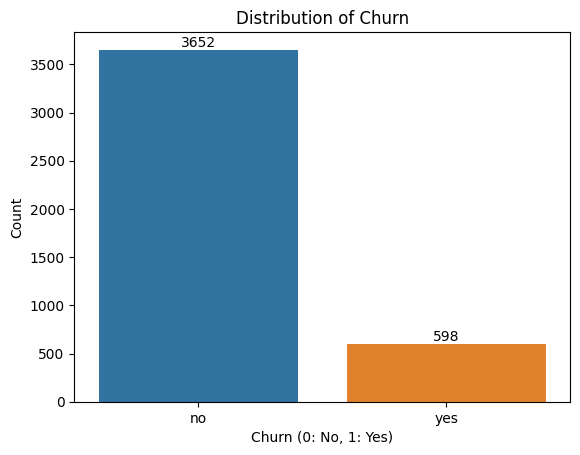

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='churn', hue='churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

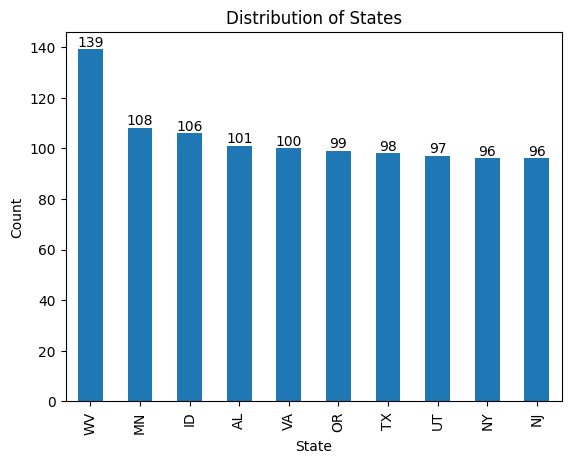

In [10]:
# distribucion por estado

state = df['state'].value_counts()

ax = state[:10].plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

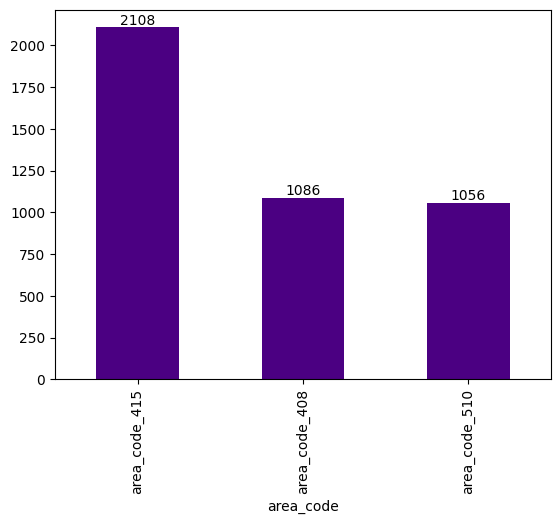

In [11]:
area_code = df['area_code'].value_counts()
ax = area_code.plot(kind='bar', color='indigo')
ax.bar_label(ax.containers[0], fontsize=10);


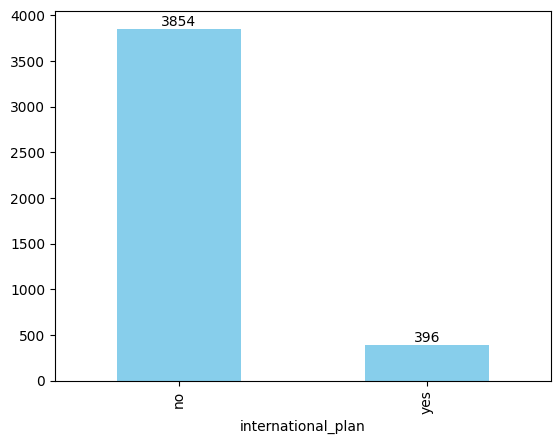

In [12]:
international_plan = df['international_plan'].value_counts()
ax = international_plan.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fontsize=10);



Distribucion con datos NO categoricos

In [13]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [14]:
train_num = df.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


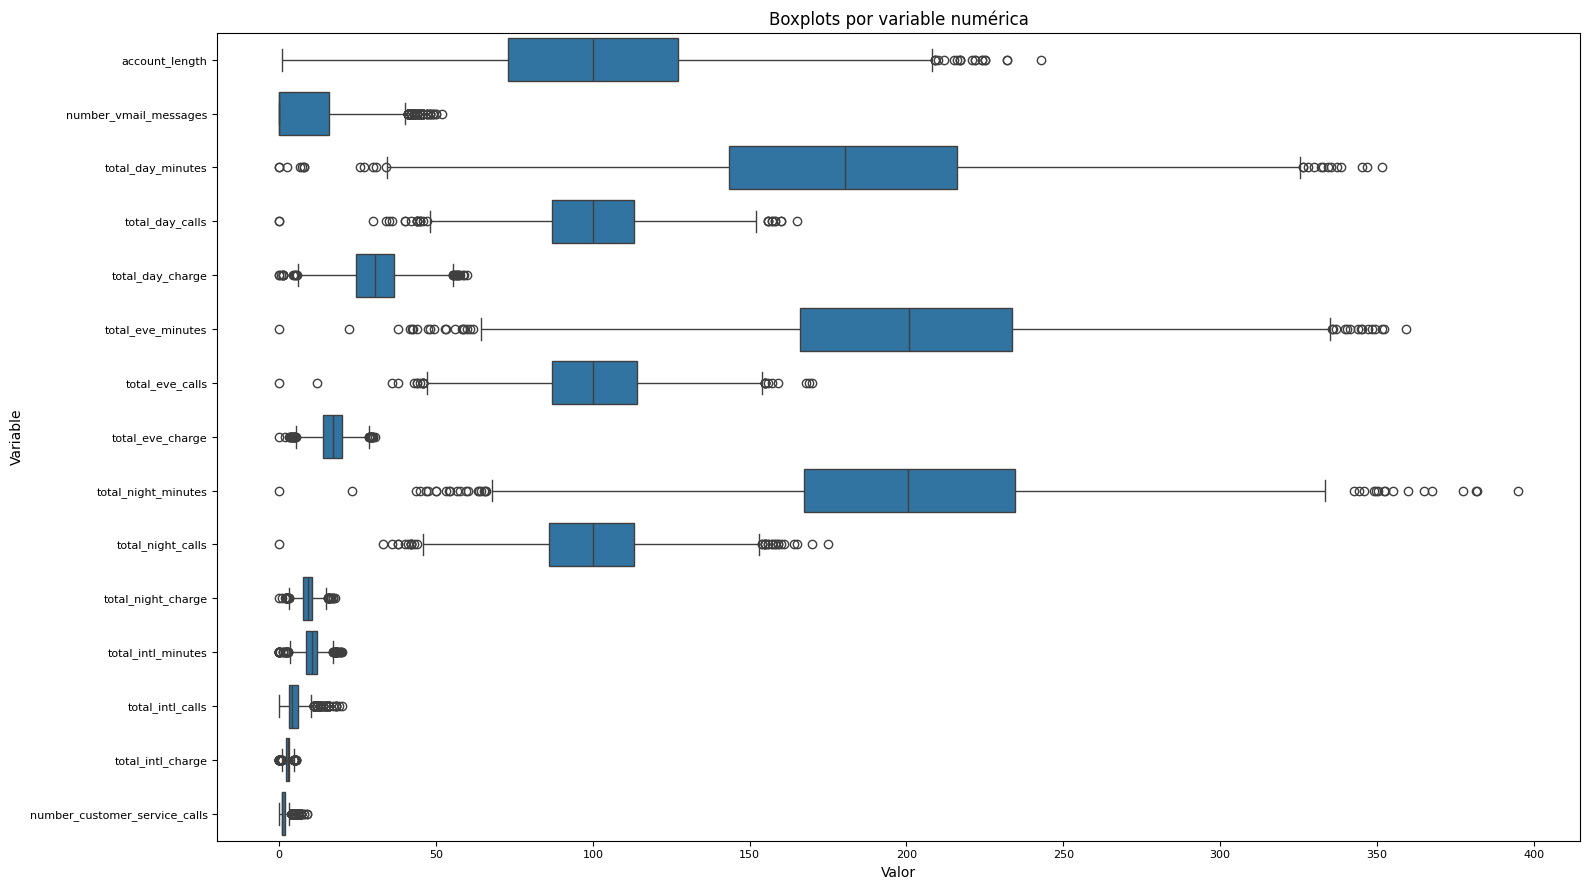

In [15]:
# train_num.plot(kind='box', subplots=True, layout=(5, 4), figsize=(16, 20), fontsize=8)

# Derretimos el DataFrame para usarlo con seaborn
train_num_melted = train_num.melt(var_name="Variable", value_name="Valor")

plt.figure(figsize=(16, 9))
sns.boxplot(data=train_num_melted, x="Valor", y="Variable", orient="h")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Boxplots por variable numérica", fontsize=12)
plt.tight_layout()
plt.show()

### Manejo de Outliers

In [16]:
n = 0

for col in train_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in {}'.format(total, col))



There are 20 row data outlier in account_length
There are 86 row data outlier in number_vmail_messages
There are 25 row data outlier in total_day_minutes
There are 28 row data outlier in total_day_calls
There are 26 row data outlier in total_day_charge
There are 34 row data outlier in total_eve_minutes
There are 24 row data outlier in total_eve_calls
There are 34 row data outlier in total_eve_charge
There are 37 row data outlier in total_night_minutes
There are 33 row data outlier in total_night_calls
There are 37 row data outlier in total_night_charge
There are 62 row data outlier in total_intl_minutes
There are 100 row data outlier in total_intl_calls
There are 62 row data outlier in total_intl_charge
There are 335 row data outlier in number_customer_service_calls


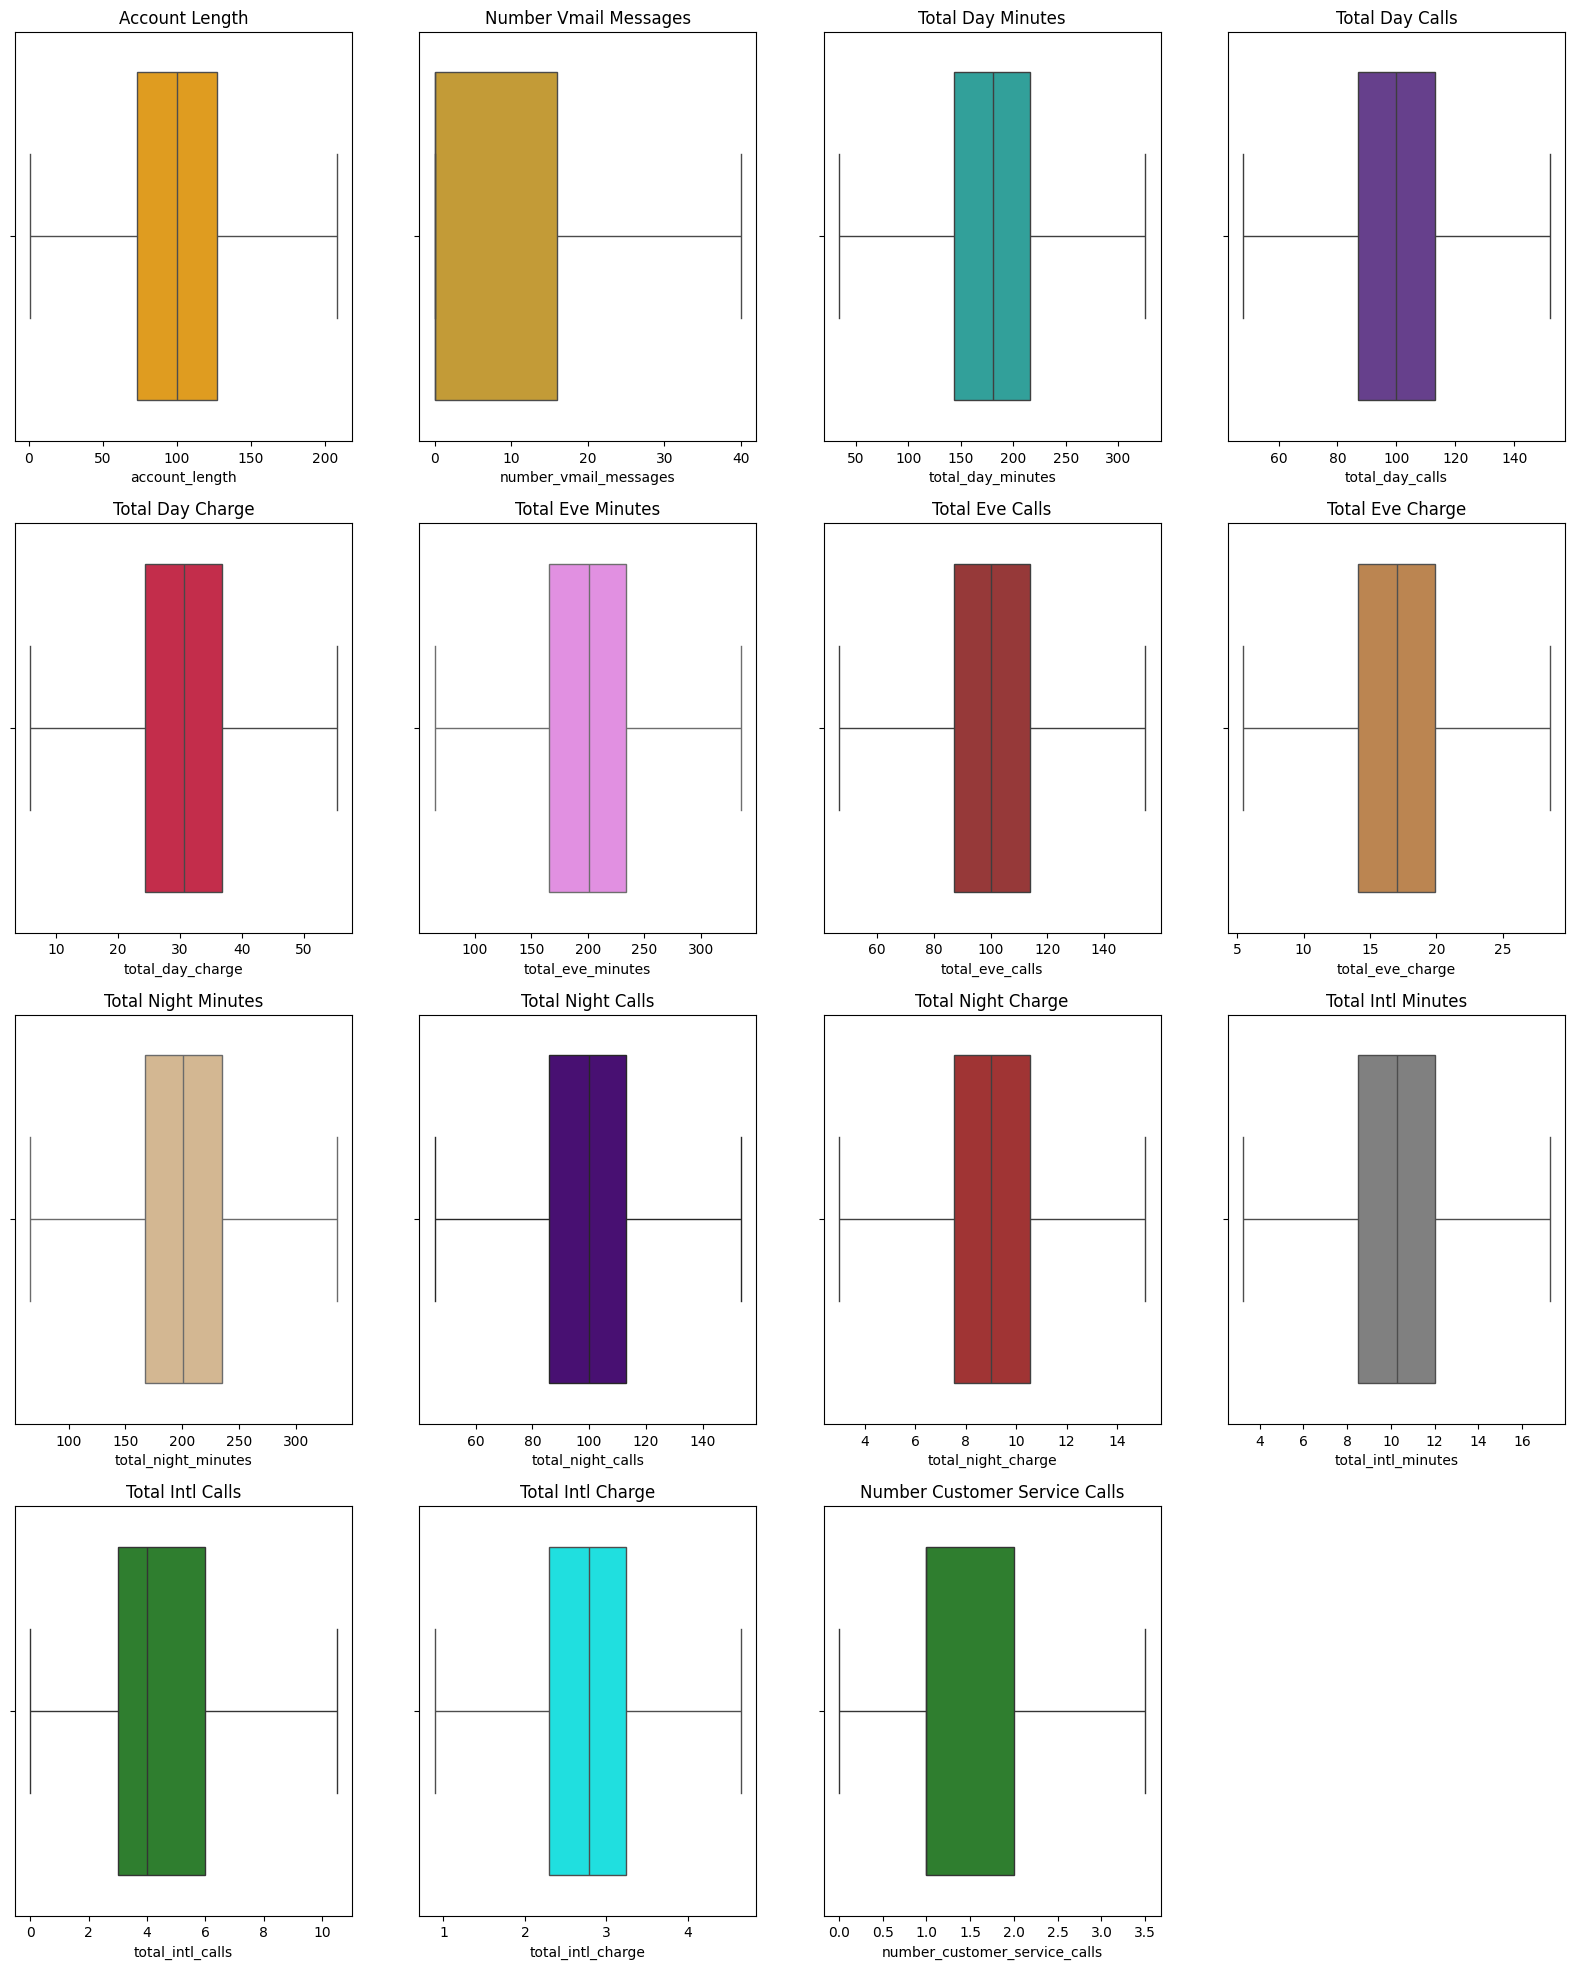

In [23]:
import re

colour_list = ['orange','goldenrod', 'lightseagreen', 'rebeccapurple', 'crimson', 'violet', 'brown', 'peru', 'burlywood', 'indigo',
           'firebrick', 'gray', 'forestgreen', 'cyan', 'forestgreen']
fig = plt.figure(figsize=[20,50])
for i, col in enumerate(train_num):
    ax = fig.add_subplot(8,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=colour_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

In [19]:
n = 0
for col in train_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    df[col] = df[col].apply(lambda x: high_limit if x > high_limit else (low_limit if x < low_limit else x))
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in columns (variables) {}'.format(total, col))

There are 0 row data outlier in columns (variables) account_length
There are 0 row data outlier in columns (variables) number_vmail_messages
There are 0 row data outlier in columns (variables) total_day_minutes
There are 0 row data outlier in columns (variables) total_day_calls
There are 0 row data outlier in columns (variables) total_day_charge
There are 0 row data outlier in columns (variables) total_eve_minutes
There are 0 row data outlier in columns (variables) total_eve_calls
There are 0 row data outlier in columns (variables) total_eve_charge
There are 0 row data outlier in columns (variables) total_night_minutes
There are 0 row data outlier in columns (variables) total_night_calls
There are 0 row data outlier in columns (variables) total_night_charge
There are 0 row data outlier in columns (variables) total_intl_minutes
There are 0 row data outlier in columns (variables) total_intl_calls
There are 0 row data outlier in columns (variables) total_intl_charge
There are 0 row data o

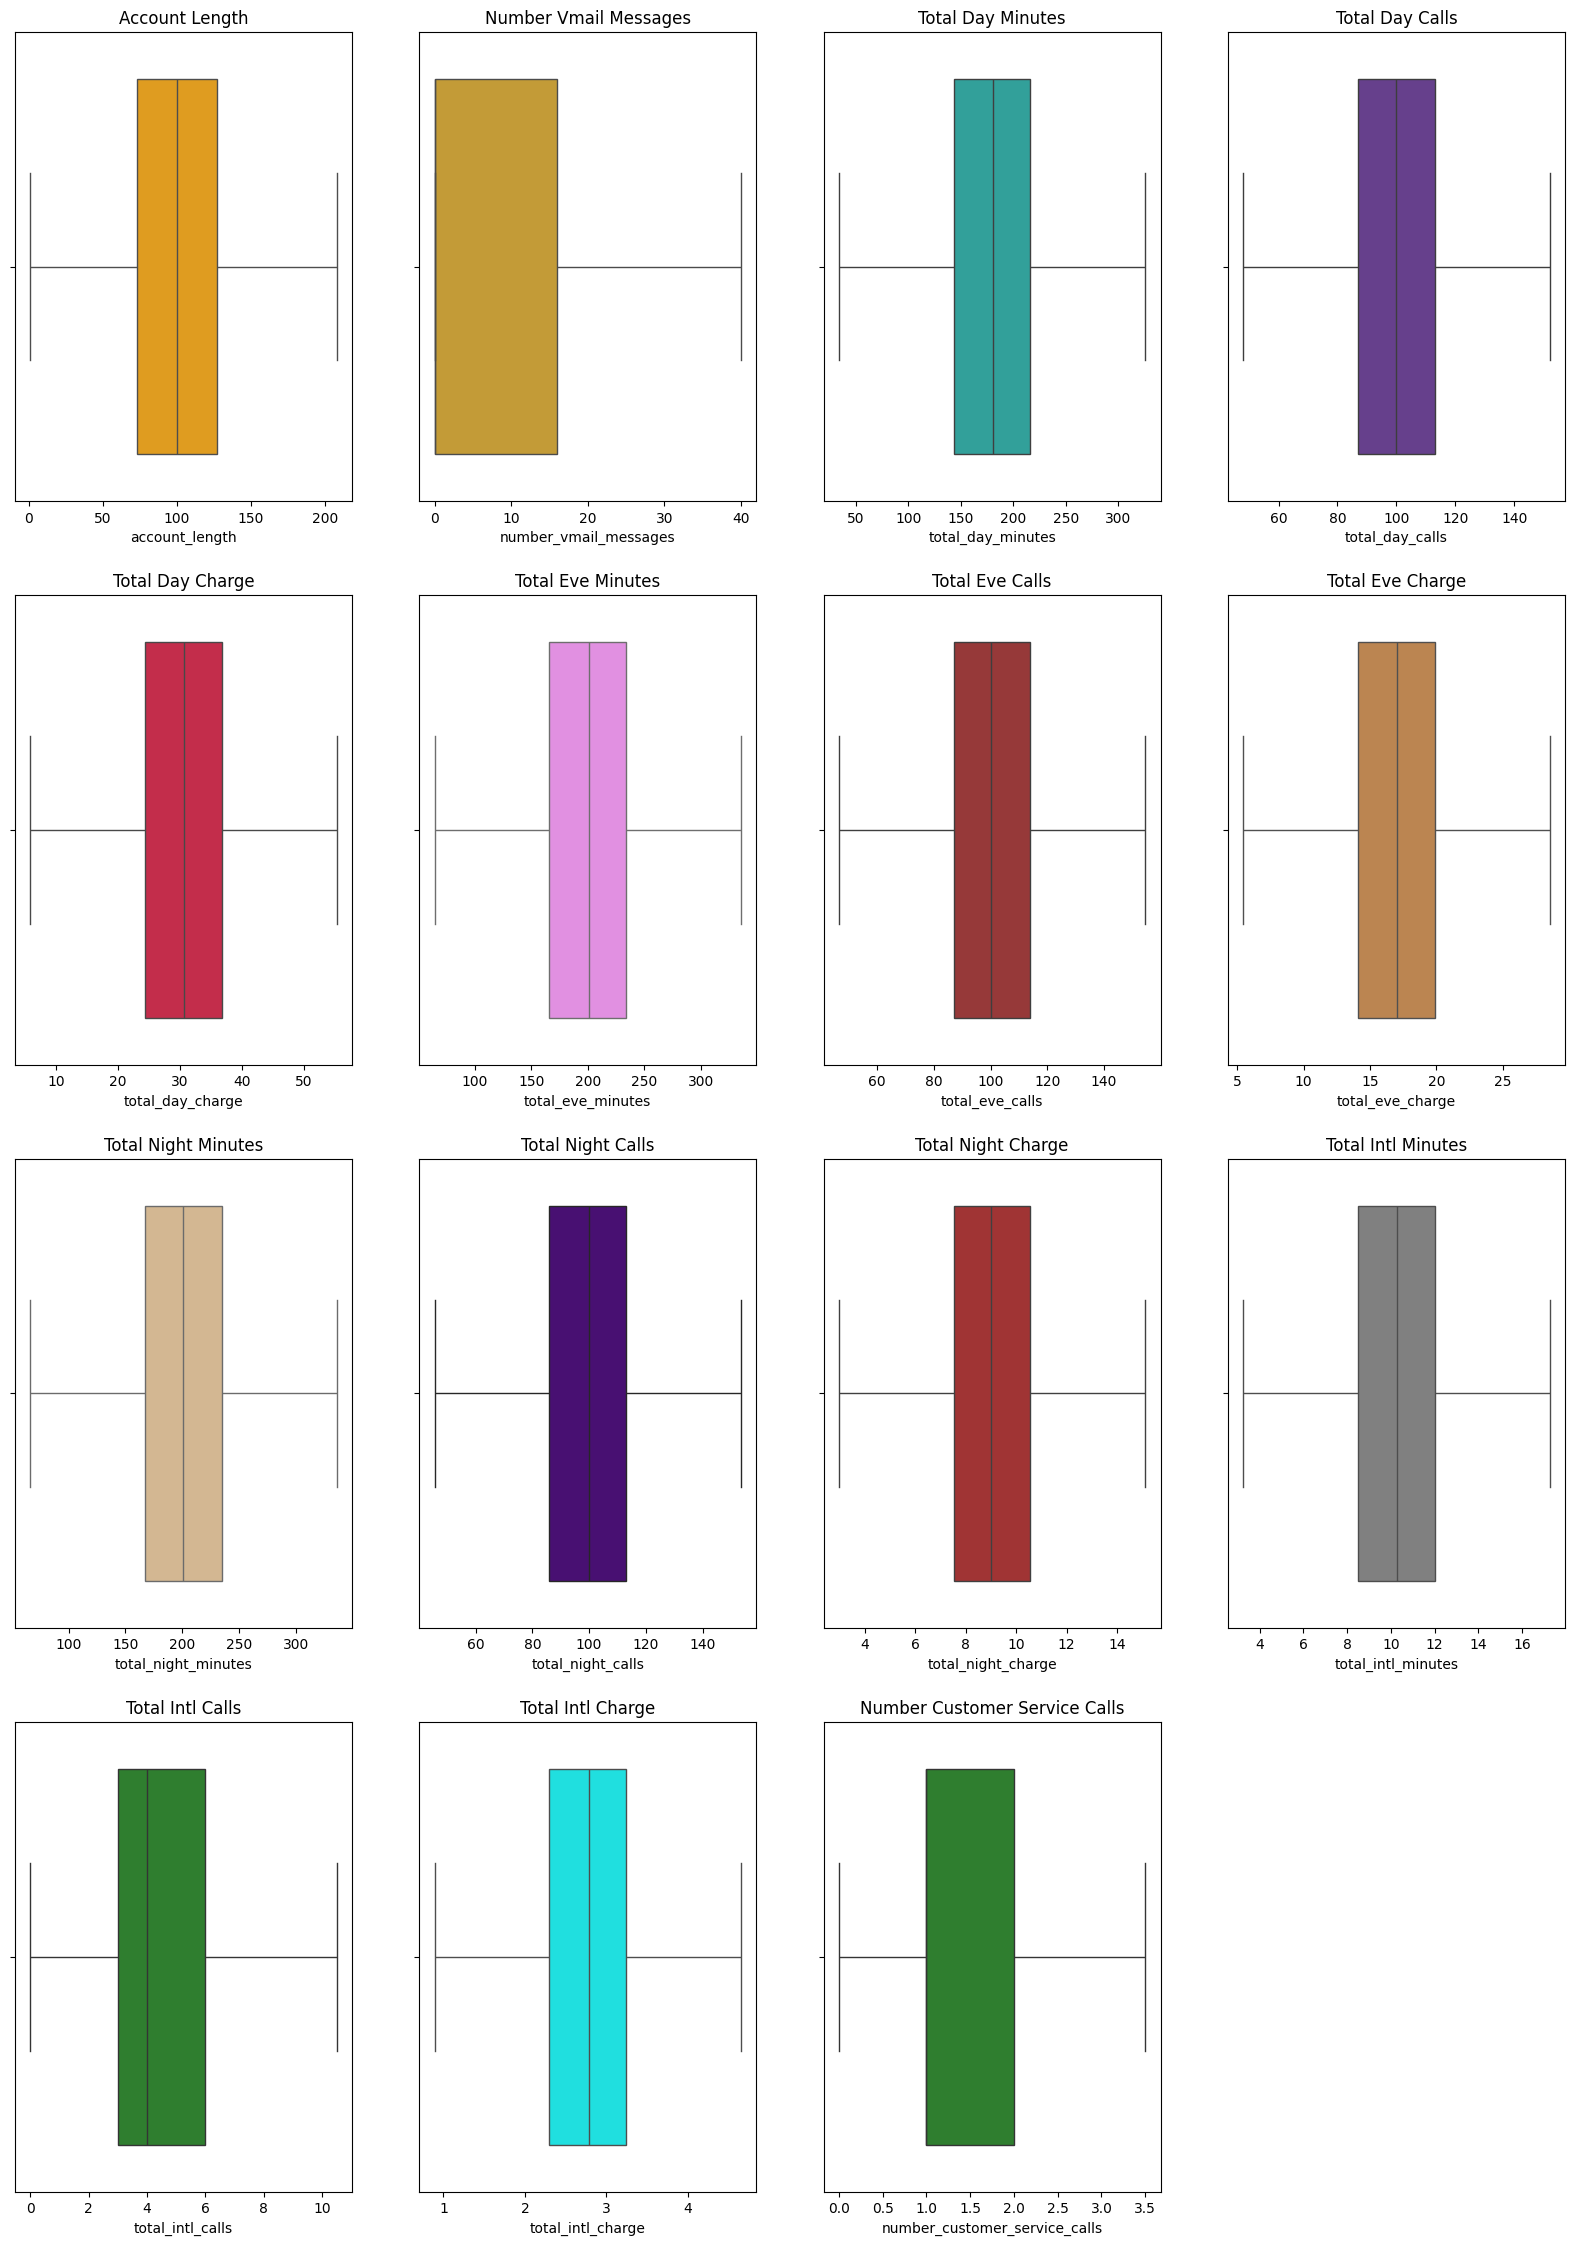

In [20]:
fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(train_num):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=colour_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

In [24]:
df_cat = df[['international_plan', 'voice_mail_plan', 'churn']].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-24-1507847854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat = df[['international_plan', 'voice_mail_plan', 'churn']].replace({'yes': 1, 'no': 0})


### Feature Engineer

In [25]:
total_minutes = train_num['total_day_minutes'] + train_num['total_eve_minutes'] + train_num['total_night_minutes']
total_charge = train_num['total_day_charge'] + train_num['total_eve_charge'] + train_num['total_night_charge']
total_calls = train_num['total_day_calls'] + train_num['total_eve_calls'] + train_num['total_night_calls']
train_num['total_minutes'] = total_minutes
train_num['total_charge'] = total_charge
train_num['total_calls'] = total_calls

In [26]:
train_num.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
                'total_day_charge', 'total_eve_charge', 'total_night_charge',
                'total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

In [27]:
train_num.head()

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_charge,total_calls
0,107,26,13.7,3,3.70,1,611.5,55.54,329
1,137,0,12.2,5,3.29,0,527.2,59.00,328
2,84,0,6.6,7,1.78,2,558.2,65.02,248
3,75,0,10.1,3,2.73,3,501.9,49.36,356
4,121,24,7.5,7,2.03,3,779.3,76.28,314


## Encoding Categorico

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
# One-hot encode categorical columns
categorical_cols = ['state', 'area_code']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = encoder.fit_transform(df[categorical_cols])
encoded_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

### Concatenacion Numericos and columnas encodeadas

In [30]:
df = pd.concat([train_num, encoded_df_train, df_cat], axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   number_vmail_messages          4250 non-null   int64  
 2   total_intl_minutes             4250 non-null   float64
 3   total_intl_calls               4250 non-null   int64  
 4   total_intl_charge              4250 non-null   float64
 5   number_customer_service_calls  4250 non-null   int64  
 6   total_minutes                  4250 non-null   float64
 7   total_charge                   4250 non-null   float64
 8   total_calls                    4250 non-null   int64  
 9   state_AK                       4250 non-null   float64
 10  state_AL                       4250 non-null   float64
 11  state_AR                       4250 non-null   float64
 12  state_AZ                       4250 non-null   f

_apartado especial: se puede hacer un feature eng por medio de metodos de RFE, Boruta o Variance Threshold_

In [31]:
X = df.drop(['churn'], axis=1)
y = df['churn']

## Split Features -> TRAIN - VALIDATION - TEST

In [34]:
# Train/Validation/Test Split - Split X and y directly
from sklearn.model_selection import train_test_split

In [35]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle=True)

## TRAIN

In [43]:
print(y_train.shape)
print(X_train.shape)

(2231,)
(2231, 65)


## TEST

In [41]:
print(y_test.shape)
print(X_test.shape)

(1275,)
(1275, 65)


## VALIDATION

In [42]:
print(y_validation.shape)
print(X_validation.shape)

(744,)
(744, 65)


---

# MODELOS A USAR

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

In [47]:
# Funcion para poder pasar de manera generica modelos y metricas necesarias
# Función mejorada para evaluación de modelos
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predecir en validation
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba) if y_pred_proba is not None else None

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_pred)

    # Reporte de clasificación
    report = classification_report(y_val, y_pred)

    # Resultados
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(report)

    # Visualización
    plt.figure(figsize=(15, 5))

    # Matriz de confusión
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Curva ROC
    if y_pred_proba is not None:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc,
        'model_obj': model
    }


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curves(models, X_train, y_train, X_val, y_val):
    plt.figure(figsize=(10, 8))

    # Binarizar las etiquetas para multiclass
    y_val_bin = label_binarize(y_val, classes=[0, 1])

    for name, model in models.items():
        model.fit(X_train, y_train)

        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_val)[:, 1]
        else:
            y_score = model.decision_function(X_val)

        # Calcular curva ROC
        fpr, tpr, _ = roc_curve(y_val, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot curva ROC
        plt.plot(fpr, tpr, lw=2,
                 label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curvas ROC de los Modelos')
    plt.legend(loc="lower right")
    plt.show()



In [46]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

In [ ]:
results = []
for name, model in models.items():
    result = evaluate_model(model, X_train, y_train, X_validation, y_validation, f"{name} (RFE)")
    results.append(result)


# Crear DataFrame con resultados mejorados
results_df = pd.DataFrame(results)
print("\nModel Comparison with Enhanced Evaluation (RFE features):")
print(results_df[['model', 'accuracy', 'f1', 'roc_auc']])

# Comparar métricas visualmente
metrics = ['accuracy', 'f1', 'roc_auc']
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=results_df, x='model', y=metric)
    plt.title(metric.upper())
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()